In [388]:
import pandas as pd

In [389]:
treino = pd.read_csv('train.csv')
teste = pd.read_csv('test.csv')

In [390]:
treino.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [391]:
treino.isnull().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [392]:
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(10)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
dtype: float64

Temos 4 colunas com mais de 80% de valores vazios 
Entendo os dados: 
 Nan não é ausencia de informação, ele é a informação

In [393]:
treino[['PoolQC','MiscFeature','Alley','Fence']] = treino[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

Visualização da relação com o preço

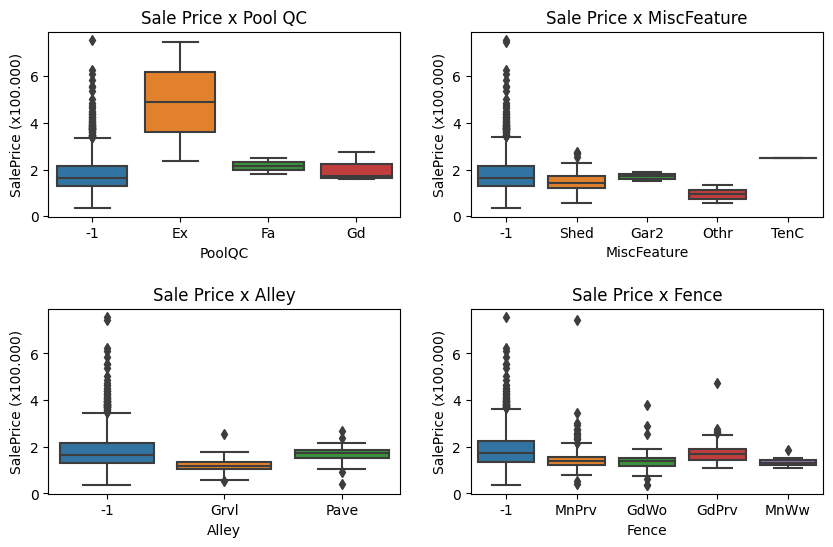

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))

sns.boxplot(x=treino.PoolQC,y=treino.SalePrice/100000,ax=ax[0,0])
ax[0,0].set_ylabel('SalePrice (x100.000)')
ax[0,0].set_title('Sale Price x Pool QC')

sns.boxplot(x=treino.MiscFeature,y=treino.SalePrice/100000,ax=ax[0,1])
ax[0,1].set_ylabel('SalePrice (x100.000)')
ax[0,1].set_title('Sale Price x MiscFeature')

sns.boxplot(x=treino.Alley,y=treino.SalePrice/100000,ax=ax[1,0])
ax[1,0].set_ylabel('SalePrice (x100.000)')
ax[1,0].set_title('Sale Price x Alley')

sns.boxplot(x=treino.Fence,y=treino.SalePrice/100000,ax=ax[1,1])
ax[1,1].set_ylabel('SalePrice (x100.000)')
ax[1,1].set_title('Sale Price x Fence')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [395]:
teste.shape

(1459, 80)

In [396]:
teste[['PoolQC','MiscFeature','Alley','Fence']] = teste[['PoolQC','MiscFeature','Alley','Fence']].fillna(-1)

In [397]:
teste.shape

(1459, 80)

Análise das colunas Fireplaces e FireplaceQu

In [398]:
treino[['Fireplaces', 'FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            690
1           Gd             324
            TA             259
2           Gd              54
            TA              53
1           Fa              28
            Po              20
            Ex              19
2           Ex               4
            Fa               4
3           Gd               2
            Ex               1
            Fa               1
            TA               1
dtype: int64

Nan em FireplaceQu também é uma informação

In [399]:
treino[['FireplaceQu']] = treino[['FireplaceQu']].fillna(-1)

In [400]:
teste[['Fireplaces','FireplaceQu']].value_counts(dropna=False)

Fireplaces  FireplaceQu
0           NaN            730
1           Gd             303
            TA             236
2           Gd              58
            TA              39
1           Fa              35
            Po              26
            Ex              18
2           Fa               6
3           Gd               3
            TA               3
2           Ex               1
4           TA               1
dtype: int64

In [401]:
teste[['FireplaceQu']] = teste[['FireplaceQu']].fillna(-1)

Visualização dos valores vazios

In [402]:
(treino.isnull().sum()/treino.shape[0]).sort_values(ascending=False).head(15)

LotFrontage     0.177397
GarageFinish    0.055479
GarageCond      0.055479
GarageYrBlt     0.055479
GarageQual      0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtCond        0.025342
BsmtFinType1    0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
BsmtHalfBath    0.000000
dtype: float64

In [403]:
treino.isnull().sum().sort_values(ascending=False).head(10)

LotFrontage     259
GarageFinish     81
GarageCond       81
GarageYrBlt      81
GarageQual       81
GarageType       81
BsmtFinType2     38
BsmtExposure     38
BsmtCond         37
BsmtFinType1     37
dtype: int64

Entendimento do tipo de propriedade que possui valor nulo

In [404]:
treino.loc[treino.LotFrontage.isnull(), 'LotConfig'].value_counts()

Inside     134
Corner      62
CulDSac     49
FR2         14
Name: LotConfig, dtype: int64

In [405]:
treino.groupby('LotConfig')['LotFrontage'].mean()

LotConfig
Corner     84.039801
CulDSac    59.911111
FR2        63.515152
FR3        70.750000
Inside     67.715686
Name: LotFrontage, dtype: float64

In [406]:
# Substituindo os valores vazios pela média em relação a Lotconfig
treino['LotFrontage'] = treino['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))


In [407]:
# Fazendo para a base de teste
teste['LotFrontage'] = teste['LotFrontage'].fillna(treino.groupby('LotConfig')['LotFrontage'].transform('mean'))

Verificação das colunas de garagem

In [408]:
col_garagem = treino.columns[treino.columns.str.contains('Garage')]
col_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

In [409]:
treino.loc[treino.GarageType.isnull(), col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0           0           NaN         NaN           81
dtype: int64

O Nan nas colunas = não existe garagem

In [410]:
# Seleção apenas das coluns vazias
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].head(3)

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN


In [411]:
# Verificando os valores
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           81
dtype: int64

In [412]:
# E substituir esses valores por -1
treino.loc[treino.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] = -1

In [413]:
treino.loc[treino.GarageCars == 0,col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
-1          -1.0         -1            0           0           -1          -1            81
dtype: int64

In [414]:
# Resumo dos valores vazios da base de treino
treino.isnull().sum().sort_values(ascending=False).head(9)

BsmtExposure    38
BsmtFinType2    38
BsmtFinType1    37
BsmtQual        37
BsmtCond        37
MasVnrType       8
MasVnrArea       8
Electrical       1
FireplaceQu      0
dtype: int64

Para a base de teste

In [415]:
# Verificando os valores
teste.loc[teste.GarageCond.isnull(),col_garagem].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  GarageCond
NaN         NaN          NaN           0.0         0.0         NaN         NaN           76
Detchd      NaN          NaN           1.0         360.0       NaN         NaN            1
                                       NaN         NaN         NaN         NaN            1
dtype: int64

In [416]:
teste.loc[teste.GarageType.isnull(),col_garagem[[0,1,2,5,6]]].value_counts(dropna=False)

GarageType  GarageYrBlt  GarageFinish  GarageQual  GarageCond
NaN         NaN          NaN           NaN         NaN           76
dtype: int64

In [417]:
teste.loc[teste.GarageType.isnull(),col_garagem[[0,1,2,5,6]]] = -1

Entendimento das colunas com tudo vazio mas GarageType = "Detchd"

In [418]:
teste.loc[teste.GarageCond.isnull(),col_garagem]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
666,Detchd,NaN,NaN,1.0,360.0,NaN,NaN
1116,Detchd,NaN,NaN,NaN,NaN,NaN,NaN


Análise da coluna GarageYrBlt

In [419]:
teste2 = teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageYrBlt != -1)]
teste2.corr()['GarageYrBlt'].sort_values(ascending=False).head(3)

GarageYrBlt    1.000000
YearBuilt      0.615951
GarageArea     0.494670
Name: GarageYrBlt, dtype: float64

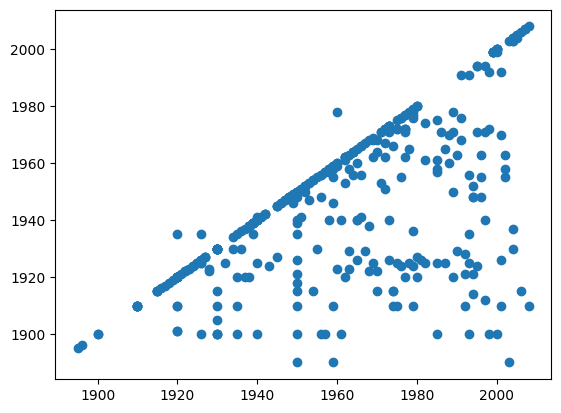

In [420]:
# Visualizando essa correlação
fig, ax = plt.subplots()

ax.scatter(teste2.GarageYrBlt,teste2.YearBuilt)

plt.show()

In [421]:
teste['CheckAnos'] = teste.GarageYrBlt == teste.YearBuilt
teste.CheckAnos.value_counts()

True     1127
False     332
Name: CheckAnos, dtype: int64

In [422]:
# Exclusão dessa coluna
teste = teste.drop('CheckAnos',axis=1)

In [423]:
# Verifição dos valores de construção da casa
teste.loc[teste.GarageCond.isnull(),'YearBuilt']

666     1910
1116    1923
Name: YearBuilt, dtype: int64

In [424]:
# Substituição das colunas vazias pelo ano de construção da casa
teste.loc[teste.GarageCond.isnull(),'GarageYrBlt'] = teste.loc[teste.GarageCond.isnull(),'YearBuilt']

Verificando coluna GarageFinish

In [425]:
# Verificando os valores mais frequentes
teste.loc[(teste.GarageType == 'Detchd'),'GarageFinish'].value_counts()

Unf    365
RFn     15
Fin     10
Name: GarageFinish, dtype: int64

In [426]:
# Verificação dos valores quando GarageType == "Detchd"
moda_GarageFinish = teste.loc[(teste.GarageType == 'Detchd'),'GarageFinish'].mode()[0]
moda_GarageFinish

'Unf'

In [427]:
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageFinish.isnull()),'GarageFinish'] = moda_GarageFinish

Verificando GarageQual e GarageCond

In [428]:
teste.loc[(teste.GarageType == 'Detchd'),['GarageQual','GarageCond']].value_counts()

GarageQual  GarageCond
TA          TA            309
Fa          TA             38
            Fa             19
TA          Fa             16
Fa          Po              3
Gd          Ex              1
Po          Fa              1
            Po              1
TA          Gd              1
            Po              1
dtype: int64

In [429]:
moda_GarageQual = teste.loc[(teste.GarageType == 'Detchd'),'GarageQual'].mode()[0]
moda_GarageCond = teste.loc[(teste.GarageType == 'Detchd'),'GarageCond'].mode()[0]
print(moda_GarageQual,moda_GarageCond)

TA TA


In [430]:
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageQual.isnull()),'GarageQual'] = moda_GarageQual

In [431]:
teste.loc[(teste.GarageType == 'Detchd') & (teste.GarageCond.isnull()),'GarageCond'] = moda_GarageCond

Verificando GarageCars e GarageArea

In [432]:
media_carros = teste.loc[(teste.GarageType == 'Detchd'),['GarageCars','GarageArea']].mean()
media_carros

GarageCars      1.519182
GarageArea    412.202046
dtype: float64

In [433]:
# Arredondamento dos valores, já que não é possível ter meio carro
media_carros = round(media_carros,0)
media_carros.values

array([  2., 412.])

In [434]:
teste.loc[(teste.GarageType == 'Detchd'),['GarageCars','GarageArea']] = media_carros.values

In [435]:
teste.iloc[[666,1116],55:70]

,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
666,Typ,0,-1,Detchd,1910.0,Unf,2.0,412.0,TA,TA,Y,64,0,180,0
1116,Typ,0,-1,Detchd,1923.0,Unf,2.0,412.0,TA,TA,Y,174,0,212,0


In [436]:
teste.isnull().sum().sort_values(ascending=False).head(10)

BsmtCond        45
BsmtQual        44
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtFullBath     2
Utilities        2
dtype: int64

Avaliação das colunas de Porão
Na: No Basement

In [437]:
col_porao = treino.columns[treino.columns.str.contains("Bsmt") & (treino.isnull().any())]
col_porao

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [438]:
# Análise dos valores
treino.loc[treino.BsmtFinType2.isnull(),col_porao].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
NaN       NaN       NaN           NaN           NaN             37
Gd        TA        No            GLQ           NaN              1
dtype: int64

In [439]:
treino.loc[treino.BsmtFinType2.isnull(),['BsmtFinType2','BsmtFinSF2']].value_counts(dropna=False)

BsmtFinType2  BsmtFinSF2
NaN           0             37
              479            1
dtype: int64

In [440]:
# Tratamento BsmtFinType2
moda_BsmtFinType2 = treino.BsmtFinType2.mode()[0]
moda_BsmtFinType2

'Unf'

In [441]:
treino.loc[(treino.BsmtFinType2.isnull()) & (treino.BsmtFinSF2 != 0),['BsmtFinType2']] = moda_BsmtFinType2

Considerando as colunas que BsmtQual e BsmtCond são vazias

In [442]:
treino.loc[treino.BsmtQual.isnull(),col_porao].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinType2
NaN       NaN       NaN           NaN           NaN             37
dtype: int64

In [443]:
treino.loc[treino.BsmtQual.isnull(),col_porao] = -1

In [444]:
treino.isnull().sum().sort_values(ascending=False).head(5)

MasVnrType      8
MasVnrArea      8
BsmtExposure    1
Electrical      1
KitchenAbvGr    0
dtype: int64

Análise BsmtExposure

In [445]:
treino.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
-1     37
Name: BsmtExposure, dtype: int64

In [446]:
moda_BsmtExposure = treino.BsmtExposure.mode()[0]
moda_BsmtExposure

'No'

In [447]:
treino.loc[treino.BsmtExposure.isnull(),'BsmtExposure'] = moda_BsmtExposure

O mesmo para teste

In [448]:
col_porao

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'], dtype='object')

In [449]:
col_porao_teste = teste.columns[teste.columns.str.contains("Bsmt") & (teste.isnull().any())]
col_porao_teste

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath'],
      dtype='object')

In [450]:
teste.loc[teste.BsmtQual.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
          Fa        No            Unf           0.0         Unf           0.0         173.0      173.0        0.0           0.0              1
          TA        No            Unf           0.0         Unf           0.0         356.0      356.0        0.0           0.0              1
          NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
dtype: int64

In [451]:
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()),col_porao_teste]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
757,NaN,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,0.0,0.0
758,NaN,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,0.0,0.0


In [452]:
teste.BsmtQual.mode()[0]

'TA'

In [453]:
teste.loc[(teste.BsmtQual.isnull()) & (teste.BsmtCond.notnull()),'BsmtQual'] = teste.BsmtQual.mode()[0]

In [454]:
teste.iloc[757:759,30:40]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating
757,TA,Fa,No,Unf,0.0,Unf,0.0,173.0,173.0,GasA
758,TA,TA,No,Unf,0.0,Unf,0.0,356.0,356.0,GasA


In [455]:
teste.loc[teste.BsmtQual.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
NaN       NaN       NaN           NaN           0.0         NaN           0.0         0.0        0.0          0.0           0.0             40
                                                                                                              NaN           NaN              1
                                                NaN         NaN           NaN         NaN        NaN          NaN           NaN              1
dtype: int64

In [456]:
teste.loc[teste.BsmtQual.isnull(),['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']] = 0


In [457]:
teste.loc[teste.BsmtQual.isnull(),['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']] = -1

In [458]:
teste.loc[teste.BsmtQual.isnull(),col_porao_teste].value_counts(dropna=False)

Series([], dtype: int64)

In [459]:
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      16
MasVnrArea      15
MSZoning         4
BsmtCond         3
Utilities        2
BsmtExposure     2
Functional       2
KitchenQual      1
Exterior2nd      1
Exterior1st      1
dtype: int64

In [460]:
teste.loc[teste.BsmtCond.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
Gd        NaN       Mn            GLQ           1044.0      Rec           382.0       0.0        1426.0       1.0           0.0             1
TA        NaN       Av            ALQ           755.0       Unf           0.0         240.0      995.0        0.0           0.0             1
                    No            BLQ           1033.0      Unf           0.0         94.0       1127.0       0.0           1.0             1
dtype: int64

In [461]:
teste.BsmtCond.mode()[0]

'TA'

In [462]:
teste.loc[teste.BsmtCond.isnull(),'BsmtCond'] = teste.BsmtCond.mode()[0]

In [463]:
teste.loc[teste.BsmtExposure.isnull(),col_porao_teste].value_counts(dropna=False)

BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  BsmtFullBath  BsmtHalfBath
Gd        TA        NaN           Unf           0.0         Unf           0.0         725.0      725.0        0.0           0.0             1
                                                                                      1595.0     1595.0       0.0           0.0             1
dtype: int64

In [464]:
teste.loc[teste.BsmtExposure.isnull(),'BsmtExposure'] = teste.BsmtExposure.mode()[0]

In [465]:
treino.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      8
MasVnrArea      8
Electrical      1
KitchenQual     0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64

In [466]:
treino.loc[treino.MasVnrType.isnull(),['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [467]:
treino.MasVnrType.mode()[0]

'None'

In [468]:
treino.loc[treino.MasVnrType.isnull(),'MasVnrType'] = treino.MasVnrType.mode()[0]

In [469]:
treino.loc[treino.MasVnrType == 'None','MasVnrArea'].value_counts()

0.0      859
1.0        2
288.0      1
344.0      1
312.0      1
Name: MasVnrArea, dtype: int64

In [470]:
treino.loc[treino.MasVnrArea.isnull(),'MasVnrArea'] = 0

Avaliando a coluna de sistema elétrico

In [471]:
treino.Electrical.mode()[0]

'SBrkr'

In [472]:
treino.loc[treino.Electrical.isnull(),'Electrical'] = treino.Electrical.mode()[0]

In [473]:
treino.isnull().sum().sort_values(ascending=False).head(10)

Id              0
CentralAir      0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64

In [474]:
teste.isnull().sum().sort_values(ascending=False).head(10)

MasVnrType      16
MasVnrArea      15
MSZoning         4
Utilities        2
Functional       2
Exterior2nd      1
SaleType         1
Exterior1st      1
KitchenQual      1
TotRmsAbvGrd     0
dtype: int64

In [475]:
teste.loc[teste.MasVnrType.isnull(),['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
231,NaN,NaN
246,NaN,NaN
422,NaN,NaN
532,NaN,NaN
544,NaN,NaN
581,NaN,NaN
851,NaN,NaN
865,NaN,NaN
880,NaN,NaN
889,NaN,NaN


In [476]:
teste.MasVnrType.value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [477]:
teste[teste.MasVnrArea > 0].MasVnrType.mode()[0]

'BrkFace'

In [478]:
teste.loc[(teste.MasVnrType.isnull()) & (teste.MasVnrArea > 0),'MasVnrType'] = teste[teste.MasVnrArea > 0].MasVnrType

In [479]:
treino.MasVnrType.mode()[0]

'None'

In [480]:
treino.MasVnrArea.mode()[0]

0.0

In [481]:
teste.loc[teste.MasVnrType.isnull(),'MasVnrType'] = treino.MasVnrType.mode()[0]
teste.loc[teste.MasVnrArea.isnull(),'MasVnrArea'] = treino.MasVnrArea.mode()[0]

In [482]:
teste.isnull().sum().sort_values(ascending=False).head(10)

MSZoning        4
Functional      2
Utilities       2
Exterior2nd     1
SaleType        1
Exterior1st     1
KitchenQual     1
KitchenAbvGr    0
GarageYrBlt     0
GarageType      0
dtype: int64

In [483]:
# Valores em MSZoning
teste.MSZoning.mode()[0]
teste.loc[teste.MSZoning.isnull(),'MSZoning'] = teste.MSZoning.mode()[0]

In [484]:
# Valores em Utilities
teste.Utilities.value_counts()
teste.loc[teste.Utilities.isnull(),'Utilities'] = teste.Utilities.mode()[0]

In [485]:
# Valores em Functional
teste.Functional.value_counts()
teste.loc[teste.Functional.isnull(),'Functional'] = teste.Functional.mode()[0]

In [486]:
print(teste.Exterior2nd.mode()[0])
print(teste.SaleType.mode()[0])
print(teste.Exterior1st.mode()[0])
print(teste.KitchenQual.mode()[0])

VinylSd
WD
VinylSd
TA


In [487]:
teste.loc[teste.Exterior2nd.isnull(),'Exterior2nd'] = teste.Exterior2nd.mode()[0]
teste.loc[teste.SaleType.isnull(),'SaleType'] = teste.SaleType.mode()[0]
teste.loc[teste.Exterior1st.isnull(),'Exterior1st'] = teste.Exterior1st.mode()[0]
teste.loc[teste.KitchenQual.isnull(),'KitchenQual'] = teste.KitchenQual.mode()[0]

In [488]:
teste.isnull().sum().sort_values(ascending=False).head(15)


Id              0
MSSubClass      0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
HalfBath        0
FullBath        0
BsmtHalfBath    0
BsmtFullBath    0
GrLivArea       0
dtype: int64

Exportação das bases

In [489]:
treino.to_csv('train_2.csv', index=False)
teste.to_csv('test_2.csv', index=False)